In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
import numpy as np
import sys
from scipy.stats import norm
import scipy.stats as stats
import pylab as pl

#np.set_printoptions(threshold=sys.maxsize)

#ECDF function
def ecdf(data):
  # number of data points: n
  n = len(data)
  # x-data for the ECDF: x
  x=np.sort(data)
  # y-data for the ECDF: y
  y=np.arange(1, n+1)/n
  return x,y
# Task: create a function to convert time to milliseconds
belmont = pd.read_csv("belmont.csv", sep = ';', decimal= ",") # use delimeters, try to check if all data are available

mean 149.21615384615387
standard deviation 1.7643501242516313
Outliers_min 144.0
Outliers_max 154.0


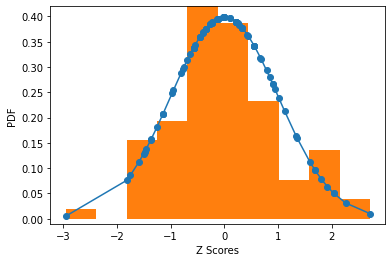

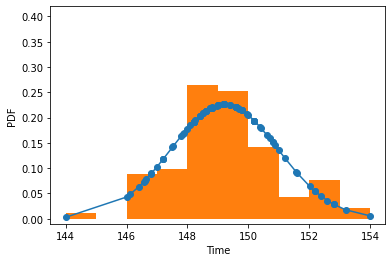

meand, std: 149.22101123595507 1.6186456017743405


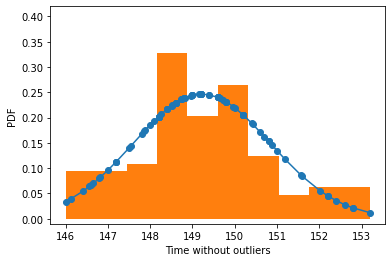

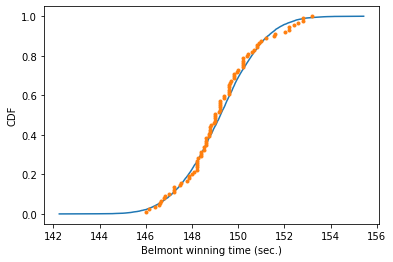

Probability of besting Secretariat: 0.000603


In [59]:
belmont

# find max value in the column
outlier_max_column = belmont["Time"]
outlier_max = outlier_max_column.max()
outlier_max

Year = belmont["Year"]

belmont["Miliseconds"] = belmont.Miliseconds.astype(float)
Time = belmont["Miliseconds"]
Time

#_ = plt.plot(Time, Year, '.')
#_ = plt.xlabel('belmont time in min')
#_ = plt.ylabel('Year')

mu_mean = np.mean(Time)
sigma_std = np.std(Time)
print('mean', mu_mean)
print('standard deviation', sigma_std)

# calculate Z-scores to find outliers
#Task: calc outliers using another methods see reccomandations

Z_scores = (Time - mu_mean)/sigma_std

Outliers_min = Z_scores.min()
# 1973 and 1970 years should be deleted from analysis

Outliers_max = Z_scores.max()
print('Outliers_min',Outliers_min*sigma_std + mu_mean)
print('Outliers_max', Outliers_max*sigma_std + mu_mean)

h_1 = sorted(Z_scores) #sorted

fit = stats.norm.pdf(h_1, np.mean(h_1), np.std(h_1)) #this is a fitting indeed

pl.plot(h_1,fit,'-o')

pl.hist(h_1,density=True) #use this to draw histogram of your data

# Make a legend, set limits and show plot
_ = plt.xlabel('Z Scores')
_ = plt.ylabel('PDF')
plt.ylim(-0.01, 0.42)
plt.show()

#Task 1: convert to array and print the whole array, combine two columns Time and Z-scores and Years and print as a table
#Task 2: delete outliers from the Time and print

#print(Time,Z_scores)

# a normal distribution with outliers
h = sorted(Time) #sorted

fit = stats.norm.pdf(h, np.mean(h), np.std(h)) #this is a fitting indeed

pl.plot(h,fit,'-o')

pl.hist(h,density=True) #use this to draw histogram of your data

# Make a legend, set limits and show plot
_ = plt.xlabel('Time')
_ = plt.ylabel('PDF')
plt.ylim(-0.01, 0.42)
plt.show()

#a normal distribution without outliers

Time_without = [148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
149.65, 148.74, 147.86, 148.75, 147.5, 148.26, 149.71, 146.56,
151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
146.13, 148.1 , 147.2 , 146, 146.4, 148.2 , 149.8 , 147,
147.2 , 147.8 , 148.2 , 149. , 149.8 , 148.6 , 146.8 , 149.6 ,
149. , 148.2 , 149.2 , 148. , 150.4 , 148.8 , 147.2 , 148.8 ,
149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
150.2 , 146.6 , 149.8 , 149. , 150.8 , 148.6 , 150.2 , 149. ,
148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
149.2 , 151. , 149.6 , 149.6 , 149.4 , 148.6 , 150. , 150.6 ,
149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
152.2 ]
type(Time_without)
# Compute mean and standard deviation: mu, sigma
mu = np.mean(Time_without)
sigma = np.std(Time_without)

print('meand, std:', mu, sigma)

h = sorted(Time_without) #sorted

fit = stats.norm.pdf(h, np.mean(h), np.std(h)) #this is a fitting indeed

pl.plot(h,fit,'-o')

pl.hist(h,density=True) #use this to draw histogram of your data

# Make a legend, set limits and show plot
_ = plt.xlabel('Time without outliers')
_ = plt.ylabel('PDF')
plt.ylim(-0.01, 0.42)
plt.show()

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(Time_without)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

# to find out if it is possible to hit Secretariats record
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144) / len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)

In [60]:
belmont['Miliseconds'] = belmont['Miliseconds'].map(lambda x: float(x) * 1000)

print(belmont)

    Year            Winner           Jockey              Trainer  \
0   2016           Creator   Irad Ortiz, Jr       Steve Asmussen   
1   2015  American Pharoah  Victor Espinoza          Bob Baffert   
2   2014          Tonalist     Joel Rosario   Christophe Clement   
3   2013     Palace Malice       Mike Smith        Todd Pletcher   
4   2012        Union Rags   John Velazquez         Michael Matz   
..   ...               ...              ...                  ...   
86  1930       Gallant Fox       Earl Sande      Jim Fitzsimmons   
87  1929     Blue Larkspur      Mack Garner  Herbert J. Thompson   
88  1928              Vito  Clarence Kummer           Max Hirsch   
89  1927       Chance Shot       Earl Sande           Pete Coyne   
90  1926          Crusader   Albert Johnson        George Conway   

                 Owner     Time  Miliseconds    Track    miles  Unnamed: 9  
0     WinStar Farm LLC  2:28.51     148510.0  Belmont  01. Mai        28.0  
1   Zayat Stables, LLC  2:26.

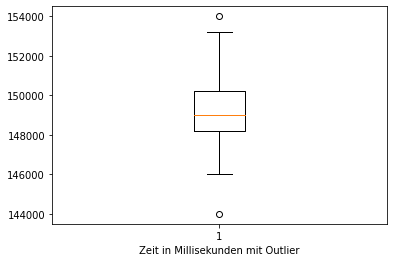

Mean w/o outliers:  149175.79545454544
Median w/o outliers:  149000.0
Variance:  2467828.9127066117
Standard Deviation:  1570.9324978198813


In [61]:
plt.boxplot("Miliseconds", data=belmont)

plt.xlabel("Zeit in Millisekunden mit Outlier")

plt.show()

ms = belmont["Miliseconds"].to_numpy()

def outlier_treatment(datacolumn):
  sorted(datacolumn)
  Q1,Q3 = np.percentile(datacolumn , [25,75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range,upper_range


lower, upper = outlier_treatment(ms)

arr_ms_cleansed = ms[(ms > lower) & (ms < upper)]


print("Mean w/o outliers: ", np.mean(arr_ms_cleansed))
print("Median w/o outliers: ", np.median(arr_ms_cleansed))

variance = np.var(arr_ms_cleansed)

print('Variance: ', variance)
print('Standard Deviation: ', np.sqrt(variance))

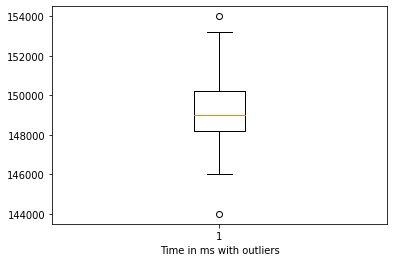

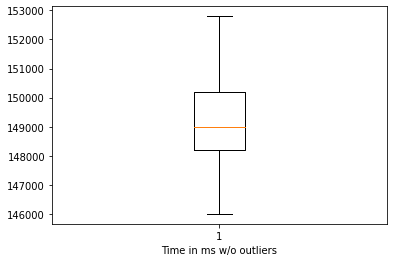

In [62]:
plt.boxplot("Miliseconds", data=belmont)

plt.xlabel("Time in ms with outliers")

# plt.ylim((14400, 15400))

plt.show()

plt.boxplot(arr_ms_cleansed)

plt.xlabel("Time in ms w/o outliers")

# plt.ylim((14400, 15400))

plt.show()